# Schützenfisch Aufgabe

Gegeben:
- $n_{H_2O}$ = 1,333 (bei $\vartheta$ = 20°C und $\lambda$ = 589nm)
- $n_{Luft}$ = 1

Mit dem Brechunggesetz

$ n_{Luft} \cdot \sin(\alpha) = n_{H_2O} \cdot \sin(\beta)  $

und $\alpha=\delta+\beta$ ergibt sich

$ n_{Luft} \cdot \sin(\delta+\beta) = n_{H_2O} \cdot \sin(\beta)  $.

Diese Formel lässt sich über die Näherung für kleine Winkel $\sin(\alpha)=\alpha$ zu

$\delta\approx\frac{\beta}{3}$

umstellen.

![Skizze](Skizzen/Schuetzenfisch_Skizze.png)


In [18]:
#Import der benötigten Bibliotheken
import math 
import matplotlib.pyplot as plt
import numpy as np

In [103]:
def calulate_alpha(beta):
    sina, alpha = 0,0
    sina = math.sin(math.radians(beta)) * 1.333 #n_H20=1.333
    if sina < 1:
        alpha = math.degrees(math.asin(sina)) 
    else:
        sina = 1
        alpha = math.degrees(math.asin(sina)) 
    return alpha

In [117]:
def plot_fisch_aufgabe(beta):
    #Abfangen zu großer Winkel
    if beta > 90 or beta < -90:
        print(r'Ich glaube der Fisch liegt auf dem Trockenen. Damit der Fisch nicht aus dem Wasser hüpft halte beta unter 90 ° bzw. über -90°')

    #Abfangen von Winkeln, die größer als der Totalreflexionswinkel für den Übergang Wasser->Luft sind (ca. 48 °)
    elif (beta > 48 and beta < 90) or (beta<-48 and beta>-90):
        print(r'Der eingegebene Winkel liegt über dem Grenzwinkel für Totalreflexion für den Übergang von Wasser zu Luft von ca. 48 °'
              ' d.h. der Fisch sieht unter diesem Winkel die Grenzfläche Wasser-Luft als wäre sie ein Spiegel')

    else:
        alpha = calulate_alpha(beta) #Funktion aufrufen, die den Ablenkwinkel alpha berechnet
        x, y, length = 0, 0, 8
        beta1 = beta + 270 
        endbetay =  length * math.sin(math.radians(beta1))
        endbetax = length * math.cos(math.radians(beta1))
        
        beta2 = beta1 - 180 
        endbeta2y =  length * math.sin(math.radians(beta2))
        endbeta2x = length * math.cos(math.radians(beta2))
        
     
        alpha1 = alpha + 90
        endalphay = y + length * math.sin(math.radians(alpha1))
        endalphax = length * math.cos(math.radians(alpha1))

        # plot the points      
        fig = plt.figure(num=None, figsize=(10, 5), dpi=150, facecolor='w', edgecolor='k')
        ax = plt.subplot(111)
        ax.set_ylim([-10, 10])   # set the bounds to be 10, 10
        ax.set_xlim([-10, 10])
        ax.plot([x, endbetax], [y, endbetay])
        ax.text(endbetax, endbetay, 'Fisch')
        ax.plot([x, endalphax], [y, endalphay])
        ax.text(endalphax, endalphay, 'Fliege')
        ax.plot([x, endbeta2x], [y, endbeta2y])
        ax.text(endbeta2x, endbeta2y, 'Bild')     
        ax.axhline(y=0, xmin= -6, xmax= 15, color='black', linewidth=1)
        ax.axvline(x=0, ymin= -6, ymax= 6, color='black', linewidth=1)
        ax.text(9,1, r'Luft ($n_{Luft}$=1)')   
        ax.text(9,-1.5, r'Wasser $(n_{H_2O}$=1.333)')
        ax.text(11,9,r'$\alpha = $' + str(round(alpha,2)) + '$^\circ$')
        ax.text(11,7,r'$\beta = $' + str(round(beta,2))+ '$^\circ$')
        ax.text(11,5,r'$\delta = $' + str(round(alpha - beta,2))+ '$^\circ$')
        plt.axis('off')


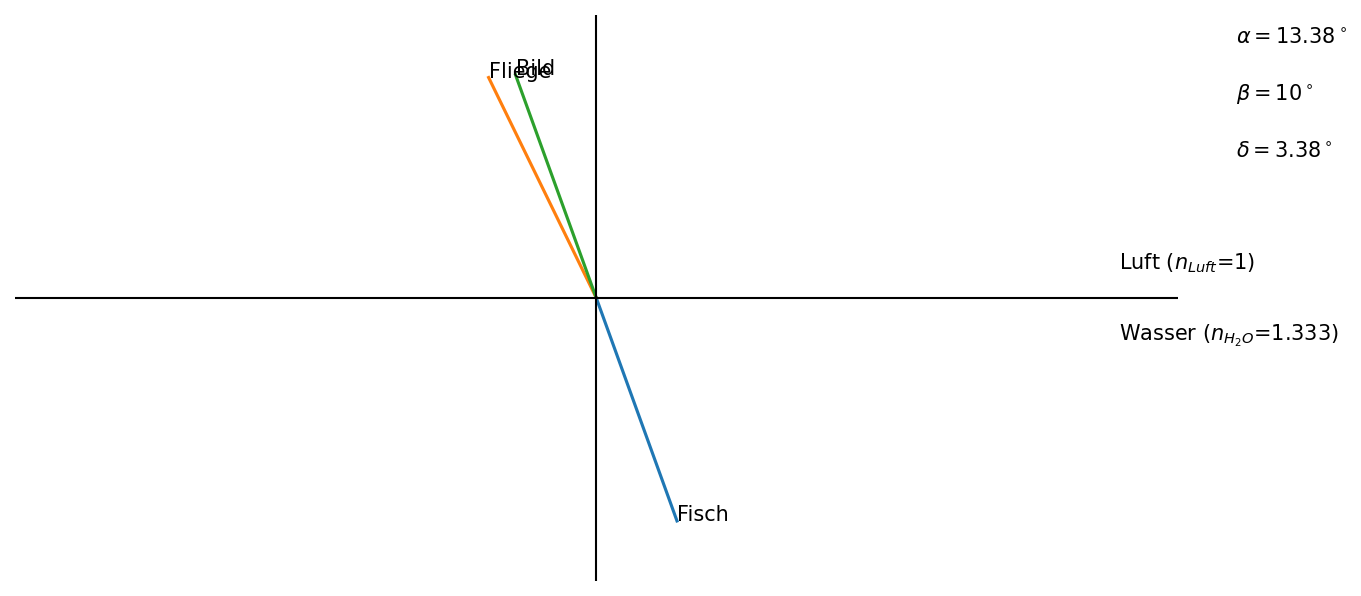

In [120]:
plot_fisch_aufgabe(beta = 10) #Blickwinkel des Fisches definieren
#Die getroffene Näherung für kleine Winkel gilt bis ca. 15°, darüber wird die Abweichung zu groß!
#vgl. beta und delta oben rechts in der Darstellung 